In [125]:
import rootnotes; import ROOT as rr; import numpy as N

In [2]:
def hough_transform(img_bin, theta_res=1, rho_res=1):
  nR,nC = img_bin.shape
  theta = N.linspace(-90.0, 0.0, N.ceil(90.0/theta_res) + 1.0)
  theta = N.concatenate((theta, -theta[len(theta)-2::-1]))
 
  D = N.sqrt((nR - 1)**2 + (nC - 1)**2)
  q = N.ceil(D/rho_res)
  nrho = 2*q + 1
  rho = N.linspace(-q*rho_res, q*rho_res, nrho)
  H = N.zeros((len(rho), len(theta)))
  for rowIdx in range(nR):
    for colIdx in range(nC):
      if img_bin[rowIdx, colIdx]:
        for thIdx in range(len(theta)):
          rhoVal = colIdx*N.cos(theta[thIdx]*N.pi/180.0) + \
              rowIdx*N.sin(theta[thIdx]*N.pi/180)
          rhoIdx = N.nonzero(N.abs(rho-rhoVal) == N.min(N.abs(rho-rhoVal)))[0]
          H[rhoIdx[0], thIdx] += 1
  return [rho, theta, H]

In [5]:
vals = N.array([[ 899.7       ,  281.43820767],
       [ 900.        ,  281.43673767],
       [ 899.4       ,  281.4264281 ],
       [ 900.6       ,  281.48938314],
       [ 900.9       ,  281.51131549],
       [ 901.2       ,  281.53201304],
       [ 927.        ,  283.27889789],
       [ 927.3       ,  283.30202583],
       [ 927.6       ,  283.32501657],
       [ 928.2       ,  283.36115888],
       [ 928.5       ,  283.38640362],
       [ 928.8       ,  283.40335758],
       [ 927.9       ,  283.34161773],
       [ 901.8       ,  281.56164816],
       [ 902.1       ,  281.58373731],
       [ 902.4       ,  281.58983289],
       [ 903.        ,  281.61950722],
       [ 903.3       ,  281.64089077],
       [ 903.6       ,  281.65519873],
       [ 902.7       ,  281.61519523],
       [ 905.4       ,  281.73894932],
       [ 905.7       ,  281.74504491],
       [ 906.        ,  281.76335126],
       [ 906.6       ,  281.79867037],
       [ 906.9       ,  281.81446793],
       [ 907.2       ,  281.81850552],
       [ 906.3       ,  281.77665963],
       [ 897.6       ,  281.31100399],
       [ 897.9       ,  281.33585673],
       [ 898.2       ,  281.36012147],
       [ 898.8       ,  281.38066221],
       [ 899.1       ,  281.40745535],
       [ 898.5       ,  281.37097984],
       [ 896.7       ,  281.26308211],
       [ 897.        ,  281.28844444],
       [ 897.3       ,  281.30132161],
       [ 900.3       ,  281.31129799],
       [ 936.6       ,  283.91309351],
       [ 936.9       ,  283.94455143],
       [ 937.2       ,  283.96274018],
       [ 937.8       ,  283.99915689],
       [ 938.1       ,  284.01942324],
       [ 938.4       ,  284.04331558],
       [ 937.5       ,  283.98004694],
       [ 917.4       ,  282.50420982],
       [ 917.7       ,  282.52720056],
       [ 918.        ,  282.5516417 ],
       [ 918.6       ,  282.60173917],
       [ 918.9       ,  282.63762668],
       [ 919.2       ,  282.66400822],
       [ 918.3       ,  282.57712163],
       [ 907.8       ,  281.85729383],
       [ 908.1       ,  281.87724658],
       [ 908.4       ,  281.89147614],
       [ 909.        ,  281.92516846],
       [ 909.3       ,  281.93931962],
       [ 909.6       ,  281.95121679],
       [ 908.7       ,  281.90466691],
       [ 904.2       ,  281.67838547],
       [ 904.5       ,  281.68832265],
       [ 904.8       ,  281.7089418 ],
       [ 903.9       ,  281.67348548],
       [ 901.5       ,  281.5483202 ],
       [ 905.1       ,  281.72246576],
       [ 907.5       ,  281.84059467],
       [ 909.9       ,  281.97201234],
       [ 910.2       ,  281.99204349],
       [ 910.8       ,  282.0300282 ],
       [ 911.1       ,  282.04259177],
       [ 911.4       ,  282.05466533],
       [ 910.5       ,  282.00503826],
       [ 912.        ,  282.10384161],
       [ 912.3       ,  282.11179919],
       [ 912.6       ,  282.14155192],
       [ 911.7       ,  282.07775408],
       [ 913.2       ,  282.18265302],
       [ 913.5       ,  282.19952857],
       [ 913.8       ,  282.22459691],
       [ 912.9       ,  282.15754548],
       [ 914.4       ,  282.27524319],
       [ 914.7       ,  282.29305954],
       [ 915.        ,  282.31238509],
       [ 914.1       ,  282.24747005],
       [ 915.6       ,  282.35883698],
       [ 915.9       ,  282.3910005 ],
       [ 916.2       ,  282.41140405],
       [ 915.3       ,  282.3486646 ],
       [ 916.8       ,  282.45695433],
       [ 917.1       ,  282.4709487 ],
       [ 916.5       ,  282.43870678],
       [ 919.5       ,  282.68098177],
       [ 919.8       ,  282.70601091],
       [ 920.4       ,  282.7527176 ],
       [ 920.7       ,  282.77592394],
       [ 921.        ,  282.80783266],
       [ 920.1       ,  282.72353327],
       [ 921.6       ,  282.85326535],
       [ 921.9       ,  282.88066608],
       [ 922.2       ,  282.90236322],
       [ 921.3       ,  282.82813821],
       [ 922.8       ,  282.96182948],
       [ 923.1       ,  282.98125303],
       [ 923.4       ,  283.00157818],
       [ 922.5       ,  282.92823516],
       [ 924.        ,  283.05581124],
       [ 924.3       ,  283.08062478],
       [ 924.6       ,  283.10261592],
       [ 923.7       ,  283.02500012],
       [ 925.2       ,  283.1524194 ],
       [ 925.5       ,  283.16913816],
       [ 925.8       ,  283.19861649],
       [ 924.9       ,  283.12686106],
       [ 926.4       ,  283.24287317],
       [ 926.7       ,  283.25831794],
       [ 926.1       ,  283.21696204],
       [ 929.1       ,  283.4322087 ],
       [ 929.4       ,  283.45257305],
       [ 930.        ,  283.49290975],
       [ 930.3       ,  283.51923249],
       [ 930.6       ,  283.54136083],
       [ 929.7       ,  283.47838619],
       [ 931.2       ,  283.58079593],
       [ 931.5       ,  283.58922391],
       [ 931.8       ,  283.60760867],
       [ 930.9       ,  283.56005918],
       [ 932.4       ,  283.65206136],
       [ 932.7       ,  283.66885851],
       [ 933.        ,  283.69218246],
       [ 932.1       ,  283.62228903],
       [ 933.6       ,  283.72681557],
       [ 933.9       ,  283.74457312],
       [ 934.2       ,  283.76315388],
       [ 933.3       ,  283.70937161],
       [ 934.8       ,  283.79984499],
       [ 935.1       ,  283.82246333],
       [ 935.4       ,  283.84402328],
       [ 934.5       ,  283.78375343],
       [ 936.        ,  283.87942079],
       [ 936.3       ,  283.90156873],
       [ 935.7       ,  283.85778244],
       [ 938.7       ,  284.06454233],
       [ 939.        ,  284.035064  ]])

In [127]:
del c1
c1 = rootnotes.default_canvas()
xmax = N.amax(vals[:,0]);
ymax = N.amax(vals[:,1]);
xmin = N.amin(vals[:,0]);
ymin = N.amin(vals[:,1]);
ndx = 0.3
ndy = 0.0802814
Nx = int((xmax - xmin)/ndx+2)
Ny = int((ymax - ymin)/ndy+2)
parmspace = N.zeros((Nx,Ny),dtype=N.int)
for v in vals:
    i = int(N.floor((v[0] - xmin)/ndx))
    j = int(N.floor((v[1] - ymin)/ndy))
    parmspace[i][j] = 1

In [129]:
del th2d
th2d = rr.TH2D("bakaa",";;",Nx,0,Nx,Ny,0,Ny)
for i in xrange(Nx):
    for j in xrange(Ny):
        th2d.Fill(i,j,parmspace[i][j])

In [130]:
rr.gStyle.SetOptStat(0)
th2d.Draw("COLZ")

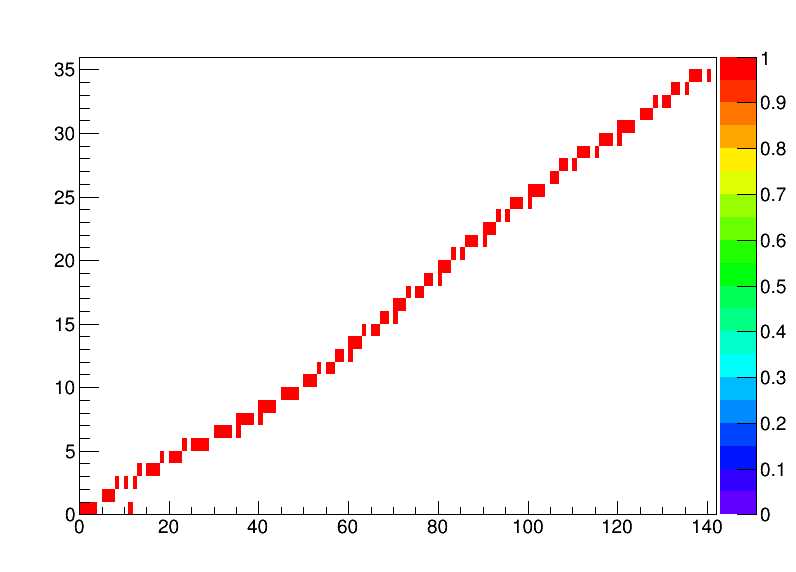

In [54]:
c1

# 

In [95]:
aho = hough_transform(parmspace,1.0,1.0)

In [119]:
del thh
thh = rr.TH2D("xxxxx",";;",180,-90,90,292,-146,146)

In [120]:
for i in xrange(len(aho[1])):
    for j in xrange(len(aho[0])):
        thh.Fill(aho[1][i],aho[0][j],aho[2][j][i])

In [142]:
del c3
c3 = rootnotes.default_canvas()

In [143]:
thh.Draw("COLZ")

## 

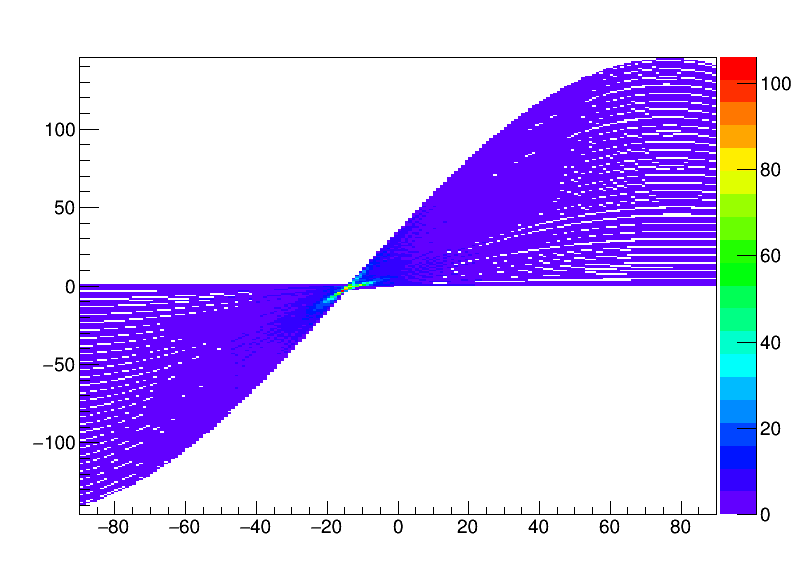

In [144]:
c3

TypeError: none of the 2 overloaded methods succeeded. Full details:
  int TH1::GetMinimumBin() =>
    takes at most 0 arguments (3 given)
  int TH1::GetMinimumBin(int& locmix, int& locmiy, int& locmiz) =>
    could not convert argument 1 (use ROOT.Long for pass-by-ref of ints)